# `matplotlib` 3D plot view rotation

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Data

In [2]:
size = 20
x = np.linspace(-1, 1, size)
y = np.linspace(-1, 1, size)
X, Y = np.meshgrid(x, y)
Z = 1 - np.abs(X+Y) - np.abs(Y-X)


## Plot

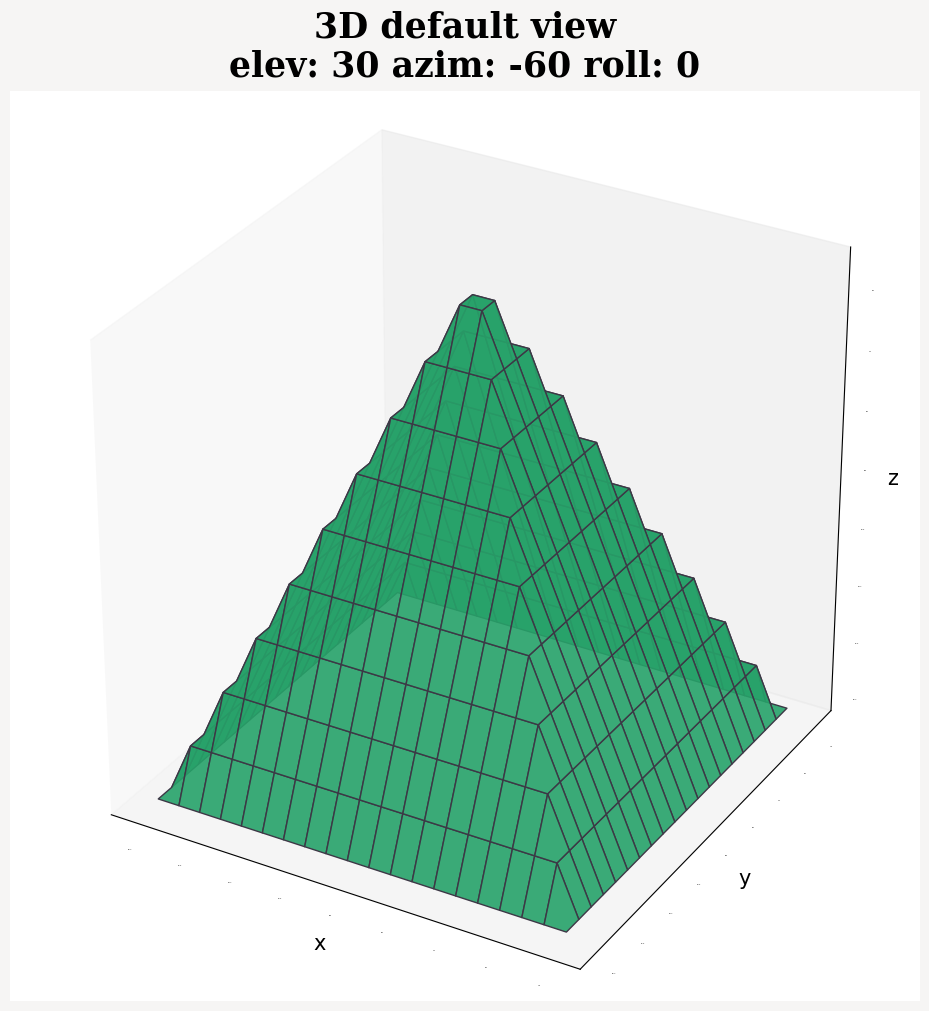

In [3]:
fig = plt.figure(
    figsize=(10, 10),
    facecolor="#f6f5f4",
    layout="constrained"
)

ax = fig.add_subplot(
    projection="3d"
)
ax.set_aspect("equal")

fig.suptitle(
    f"3D default view\nelev: {ax.elev} azim: {ax.azim} roll: {ax.roll}",
    fontsize=25,
    fontfamily="serif",
    weight="bold"
)

ax.plot_surface(
    X, Y, Z,
    facecolor="#26a269",  # green
    edgecolor="#3d3846",  # dark grey
    alpha=0.9
)

ax.tick_params(
    color=(1, 1, 1, 0),
    labelsize=0
)

ax.xaxis.set_visible(False)

ax.set_xlabel(
    "x",
    fontsize=15
)
ax.set_ylabel(
    "y",
    fontsize=15
)
ax.set_zlabel(
    "z",
    fontsize=15
)

ax.grid(
    visible=None
)

# plt.savefig(
#     fname="1.png",
#     format="png",
#     dpi=125
# );

### Show default 3D view values

In [4]:
print(
    f"elev: {ax.elev}\nazim: {ax.azim}\nroll: {ax.roll}"
)

elev: 30
azim: -60
roll: 0


## Grid

### Plotting function

In [5]:
def plot_pyramid(ax, x, y, z):
    ax.set_aspect("equal")

    ax.plot_surface(
        x, y, z,
        facecolor="#26a269",  # green
        edgecolor="#3d3846",  # dark grey
        alpha=0.9
    )

    ax.tick_params(
        color=(1, 1, 1, 0),
        labelsize=0
    )

    ax.xaxis.set_visible(False)

    ax.set_xlabel(
        "x",
        fontsize=15
    )
    ax.set_ylabel(
        "y",
        fontsize=15
    )
    ax.set_zlabel(
        "z",
        fontsize=15
    )

    ax.grid(
        visible=None
    )

In [6]:
mosaic="""
    ADG
    .E.
    CFI
"""

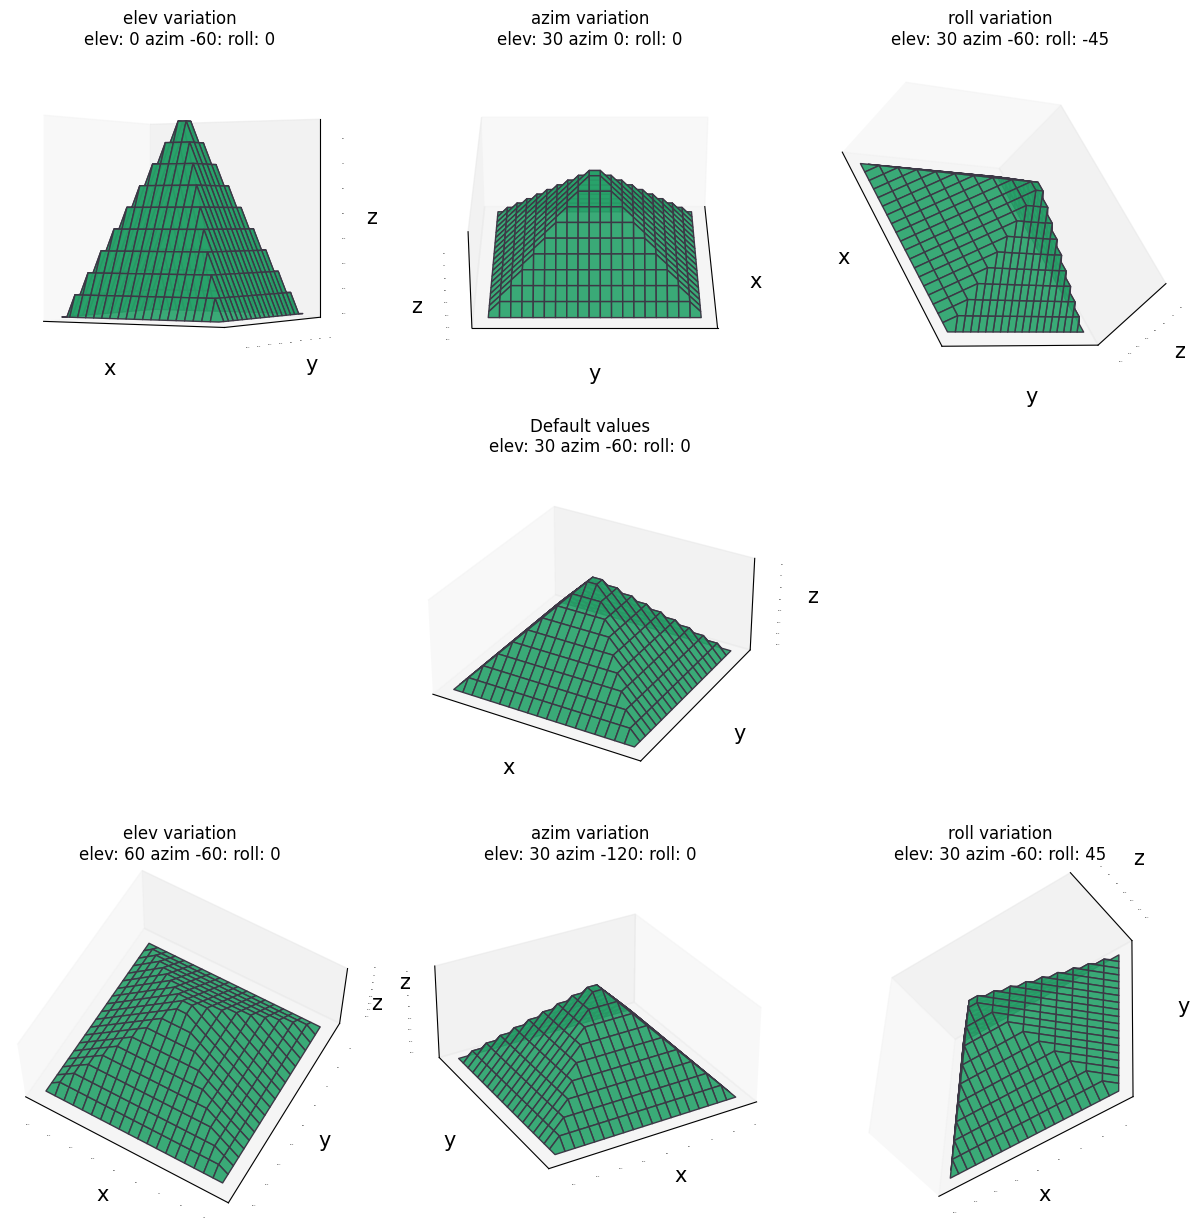

In [7]:
fig, axs = plt.subplot_mosaic(
    mosaic=mosaic,
    subplot_kw={
        "projection": "3d"
    },
    figsize=(15,15),
    sharex=True,
    sharey=True
)

# Get default angle values
elev_val, azim_val, roll_val = (
    axs["A"].elev,
    axs["A"].azim,
    axs["A"].roll,
)

# AC - elevation change
for label, angle_value in zip(list("AC"), [elev_val-elev_val, elev_val+elev_val]):
    axs[label].view_init(
        elev=angle_value,
        azim=azim_val,
        roll=roll_val, 
    )
    axs[label].set_title(
        f"elev variation\nelev: {axs[label].elev} azim {axs[label].azim}: roll: {axs[label].roll}"
    )
    plot_pyramid(axs[label], X, Y, Z)

# DEF - azimuth change
for label, angle_value in zip(list("DEF"), [azim_val-azim_val, azim_val, azim_val+azim_val]):
    axs[label].view_init(
        elev=elev_val,
        azim=angle_value,
        roll=roll_val, 
    )
    if label=="E":
        axs[label].set_title(
            f"Default values\nelev: {axs[label].elev} azim {axs[label].azim}: roll: {axs[label].roll}"
        )
    else:
        axs[label].set_title(
            f"azim variation\nelev: {axs[label].elev} azim {axs[label].azim}: roll: {axs[label].roll}"
        )

    plot_pyramid(axs[label], X, Y, Z)

# GI - roll change
for label, angle_value in zip(list("GI"), [roll_val-45, roll_val+45]):
    axs[label].view_init(
        elev=elev_val,
        azim=azim_val,
        roll=angle_value, 
    )
    axs[label].set_title(
        f"roll variation\nelev: {axs[label].elev} azim {axs[label].azim}: roll: {axs[label].roll}"
    )
    plot_pyramid(axs[label], X, Y, Z)

# plt.savefig(
#     fname="2.png",
#     format="png",
#     dpi=125
# );